# INF8111 - Fouille de données


## TP1 AUTOMNE 2024 - Préparation de données




### Instructions de remise

#### Membres de l'équipe :
    - Nom (Matricule) 1
    - Nom (Matricule) 2
    - Nom (Matricule) 3
    
#### Délivrable :

Vous devez soumettre ce notebook sur Moodle dans la boite de remise sous le nom TP1_NomDuMembre1_NomDuMembre2_NomDuMembre3.ipynb.

**NB**: Tout travail en retard sera pénalisé d'une valeur de 10\% par jour de retard.


## Introduction et objectifs

### Importation des différents modules

In [17]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import linear_model
import shap
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

### Téléchargement des données

In [45]:
import requests
response = requests.get('https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/export?format=csv&gid=1150341366')
assert response.status_code == 200, 'Wrong status code'
# convert the csv to a pandas dataframe
with open('data.csv', 'w') as f:
    f.write(response.text)

df = pd.read_csv('data.csv')

Le but de ce notebook est d'effectuer le prétraitement du dataset [HousePricePrediction](https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/edit#gid=1150341366) qui pourra être par la suite être utilisé pour entraîner un modèle de prédiction de prix de maisons.

## Préparation des données

Plusieurs étapes sont nécessaires pour préparer un dataset pour la fouille des données
- **Nettoyage des données** :
    - Suppression des attributs inutiles
    - Gestion des valeurs manquantes
    - Gestion des valeurs aberrantes
- **Transformation des données** :
    - Encodage des données
    - Normalisation des données
- **Sélection des attributs** :
    - Suppression des attributs les plus fortement corrélés

## Sommaire

1. [Première observation des données](#1.-Première-observation-des-donnees)
2. [Nettoyage des données](#2.-Nettoyage-des-données)
   1. [Suppression des attributs inutiles](#2.1.-Suppression-des-attributs-inutiles)
   2. [Gestion des valeurs manquantes](#2.2.-Gestion-des-valeurs-manquantes)
   3. [Détection des valeurs aberrantes](#2.3.-Détection-des-valeurs-aberrantes)
3. [Transformation des données](#3.-Transformation-des-données)
   1. [Encodage des attributs de type `object`](#3.1.-Encodage-des-attributs-de-type-object)
   2. [Normalisation des données](#3.2.-Normalisation-des-données)
4. [Sélection des attributs](#4.-Sélection-des-variables)
   1. [Suppression des attributs corrélées](#4.1.-Suppression-des-variables-corrélées)
5. [Récapitulatif des procédés](#5.-Récapitulatif-des-prétraitements)
6. [Entrainement d'un modèle de régression linéaire](#6.-Récapitulatif-des-prétraitements)
    1. [Rappel du concept](#6.1.-Rappel-concept)
    2. [Application](#6.2.-Application)
    3. [Sélection des attributs importants](#6.3.-Sélection-des-attributs-importants)
7. [Méthode des écarts interquartiles ou IRQ](#7.-Récapitulatif-des-prétraitements)

## 1. Exploration des données (5 points)

Nous vous avons fourni le fichier *data.csv* avec l'exécution de la deuxième cellule. Il contient l'ensemble des données. Chaque ligne contient les données d'une vente. La description des attributs du dataset est la suivante:

| # | Feature Name | Description |
|---|--------------|-------------|
| 1 | Id           | Numéro de vente / To count the records. |
| 2 | MSSubClass   | Type de logement / Identifies the type of dwelling involved in the sale. |
| 3 | MSZoning     | Zonage / Identifies the general zoning classification of the sale. |
| 4 | LotArea      | Superficie du logement / Lot size in square feet. |
| 5 | LotConfig    | Configuration du logement / Configuration of the lot |
| 6 | BldgType     | Type de logement / Type of dwelling |
| 7 | OverallCond  | Etat général / Rates the overall condition of the house |
| 8 | YearBuilt    | Année de contruction / Original construction year |
| 9 | YearRemodAdd | Année de rénovation / Remodel date (same as construction date if no remodeling or additions). |
| 10| Exterior1st  | Type de revêtement extérieur / Exterior covering on house |
| 11| BsmtFinSF2   | Surface de vie / Type 2 finished square feet. |
| 12| TotalBsmtSF  | Surface totale de la base / Total square feet of basement area |
| 13| SalePrice    | Prix de vente à prédire / To be predicted |

On visualise le dataset pour avoir une idée de ce qu'il contient et des prétraitements à effectuer.

### 1.1 - Question 1 (2.5 points)

**Combien d'éléments contient le dataset ? Quelles sont les types des attributs du dataset ?**

In [46]:
#TODO
print(f"nombre d'éléments  : {df.shape[0]} \nles types d'attributs :\n{df.dtypes} " )

nombre d'éléments  : 2919 
les types d'attributs :
Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object 


### 1.2 - Question 2 (2.5 points)

**Quelles sont les valeurs uniques des attributs de type `object` ?**

In [47]:
#TODO
#print(set(df['MSZoning']))
for column in df.select_dtypes(include='object').columns:
    print(f"Valeurs uniques pour {column} : {df[column].unique()}")

Valeurs uniques pour MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Valeurs uniques pour LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Valeurs uniques pour BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Valeurs uniques pour Exterior1st : ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' nan]


## 2. Nettoyage des données (30 points)

### 2.1 Suppression des attributs inutiles

### 2.1.1 - Question 3 (5 points)

**Pourquoi on peut supprimer l'attribut `Id` dans le cas de ce TP? Effectuez cette suppression.**

L'attribut id ne contribue aucunement au prix de vente d'un logmemnt. Par conséquent nous pouvons le supprimer.

In [48]:

df.drop(labels='Id' , axis=1 , inplace = True)
df
#TODO

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


### 2.2 Gestion des valeurs manquantes

Pour gérer les valeurs manquantes, plusieurs solutions s'offrent à nous :
- Remplacer par la valeur la plus fréquente (le mode)
- Remplacer par la valeur moyenne/médiane
- Suppression des lignes contenant des valeurs manquantes

Pour ce TP, nous utiliserons la dernière option car nous avons peu de valeurs manquantes.

#### 2.2.1 - Question 4 (2.5 points)

**Quels attributs contiennent des valeurs manquantes ?**

In [49]:
valeurs_manquantes = df.isnull().sum()

# Afficher les colonnes avec des valeurs manquantes
print("Nombre de valeurs manquantes par colonne :")
print(valeurs_manquantes[valeurs_manquantes > 0])

Nombre de valeurs manquantes par colonne :
MSZoning          4
Exterior1st       1
BsmtFinSF2        1
TotalBsmtSF       1
SalePrice      1459
dtype: int64


#### 2.2.2 - Question 5 (2.5 points)

On peut alors gérer les valeurs manquantes colonne par colonne. L'attribut `SalePrice` n'est pas pris en considération car les valeurs manquantes sont justement les valeurs que nous voulons prédire.

**Supprimer les lignes contenant les valeurs manquantes. Implémentez la fonction `delete_missing_values` qui retire ces données**.

In [50]:
def delete_missing_values(dataset):
    """
    This function deletes row whom a value is missing.

    :param dataset: ensemble des données
    :return:
      dataset traitée
      
    """
    # Suppression des lignes avec des valeurs manquantes, en excluant 'SalePrice'
    data_clean = dataset.dropna(subset=[col for col in dataset.columns if col != 'SalePrice'])
    
    return data_clean

In [51]:
df = delete_missing_values(df)

Les données manquantes pour la colonne `SalePrice` sont celles du dataset de test. On laisse donc ces valeurs manquantes car on veut appliquer le même prétraitement sur les données de test.

### 2.2.3 - Question 6 (10 points)

On veut néanmoins que les données d'entrainement suivent une distribution gaussienne.

**Implémenter le fonction `plot_hist`. Cette fonction doit permettre d'afficher la distribution des valeurs de l'attribut `SalePrice` ainsi que la loi normale de même moyenne et variance.**

In [52]:
def plot_hist(prices , log = False):
    """
    Affiche la distribution du prix de vente
    :param prices: ensemble des prix.
    """
    mu = np.mean(prices)
    sigma = np.std(prices, ddof=1)  # ddof=1 pour obtenir un estimateur non biaisé de l'écart-type

    # Création d'un histogramme pour les prix
    if log == False  : 
        plt.hist(prices, bins=30, alpha=0.6, color='g', density=True, label='Histogramme de SalePrice')
    else : 
        plt.hist(prices, bins=30, alpha=0.6, color='g', density=True, label='Histogramme de LogSalePrice')
        

    # Création de la distribution normale
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, sigma)

    # Tracer la distribution normale
    plt.plot(x, p, 'k', linewidth=2, label='Fit normal (mu={:.2f}, sigma={:.2f})'.format(mu, sigma))

    title = "Fit de la distribution de 'SalePrice': mu = {:.2f}, sigma = {:.2f}".format(mu, sigma)
    plt.title(title)
    plt.xlabel('SalePrice')
    plt.ylabel('Densité')
    plt.legend()

    plt.show()
    

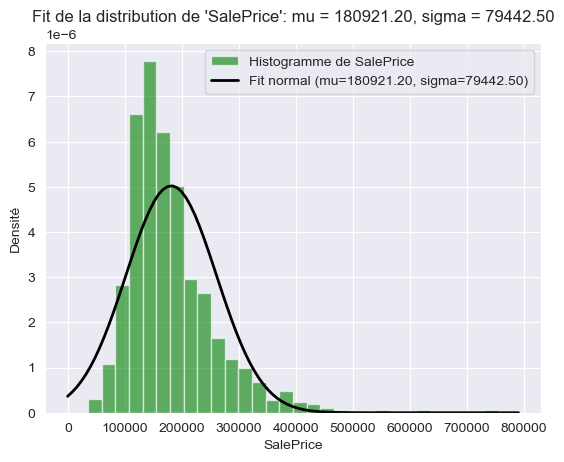

In [53]:
plot_hist(df['SalePrice'])

Vous devez obtenir une distribution des valeurs de `SalePrice` proches d'une distribution normale mais légèrement asymétrique. On peut alors appliquer une transformation logarithmique pour approcher d'une distribution normale symétrique.

**Effectuer cette transformation sur notre ensemble de données.**

C:\Users\dalil\AppData\Local\Temp\ipykernel_28076\2915392248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SalePrice'] = np.log(df['SalePrice'].dropna())


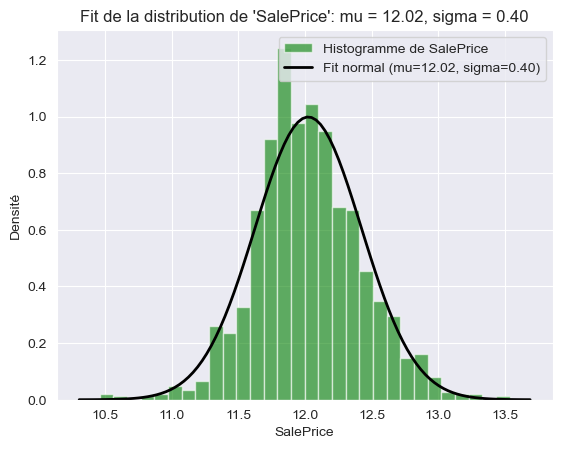

In [54]:
#TODO
df['SalePrice'] = np.log(df['SalePrice'].dropna())
plot_hist(df['SalePrice'])


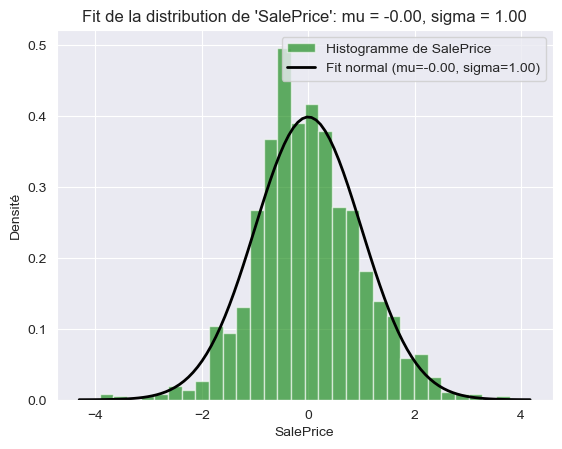

In [100]:
plot_hist(df['SalePrice'])

### 2.3 Détection des valeurs aberrantes

En pratique, la méthode de détection d'une valeur aberrante nécessite de se poser les questions suivantes:
- Quelles valeurs seraient incohérentes pour chaque colonne ?
- Quelles valeurs peuvent être problématiques pour l'utilisation de ces données ? Exemple: pour une régression linéaire, on préfère avoir des valeurs distribuées suivant une loi normale.

Avec ces éléments, on peut:
- Fixer des seuils de tolérance pour les valeurs aberrantes
- Utiliser des algorithmes de détection de valeurs aberrantes (ex: clustering, IRQ, [QTest](https://plotly.com/python/v3/outlier-test/), ...)

A noter que suivant les méthodes, les valeurs détectées comme aberrantes peuvent être différentes.

La méthode IRQ fait l'objet d'une question, en fin de ce notebook.

### 2.3.1 Question 7 (10 points)

Ici comme nous allons réaliser une régression linéaire, nous allons visuellement voir si certains points s'écartent franchement de la droite de régression.

On sait que l'on veut effectuer une régression linéaire pour prédire `SalePrice`. On peut donc visualiser les valeurs de chaque attribut en fonction de `SalePrice` pour détecter la présence de valeurs aberrantes.

**Implémenter la fonction `plot_line`. Elle doit permettre de visualiser la relation entre un attribut donné et `SalePrice`.**

In [55]:
def plot_line(attr):
    """
    Affiche la relation entre attr et SalePrice
    :param attr: attribut à comparer à SalePrice
    """
    if attr in df.columns and df[attr].dtype not in ['int64' , 'float64']   : 
        print('the values cannot be printed')
        return 
    
    new_df = pd.DataFrame({attr : df[attr] ,'SalePrice' :  df['SalePrice']})
    new_df.sort_values(by  = attr)
    new_df = new_df.iloc[:1459]
    
    m, b = np.polyfit(new_df[attr], new_df['SalePrice'], 1)  # m = pente, b = intercept

    plt.figure(figsize=(10, 5))  
    
    plt.plot(new_df[attr], new_df['SalePrice'], marker='o',linestyle='', color='b')
    plt.plot(new_df[attr], m*new_df[attr] + b, color='red') 
    plt.title(f'Relation entre {attr} et SalePrice') 
    plt.xlabel(attr) 
    plt.ylabel('SalePrice')  
    plt.grid(True) 
    plt.show()


**Afficher les relations de tous les attributs avec `SalePrice`. Peut-on y déceler des valeurs aberrantes ?**

float64


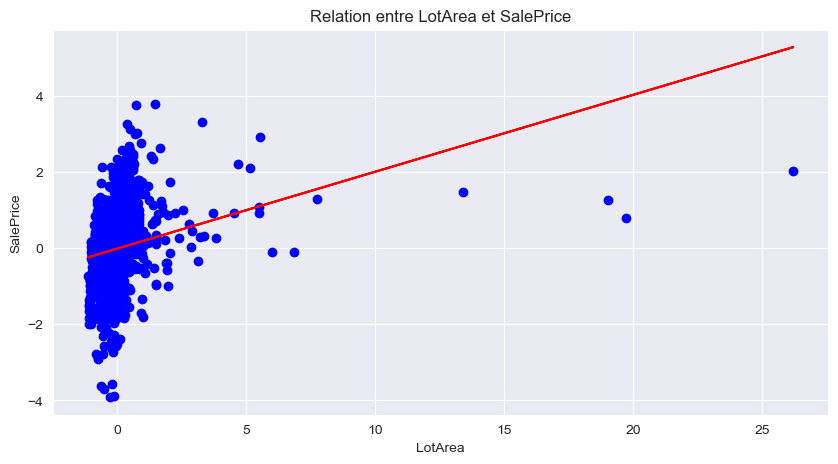

float64


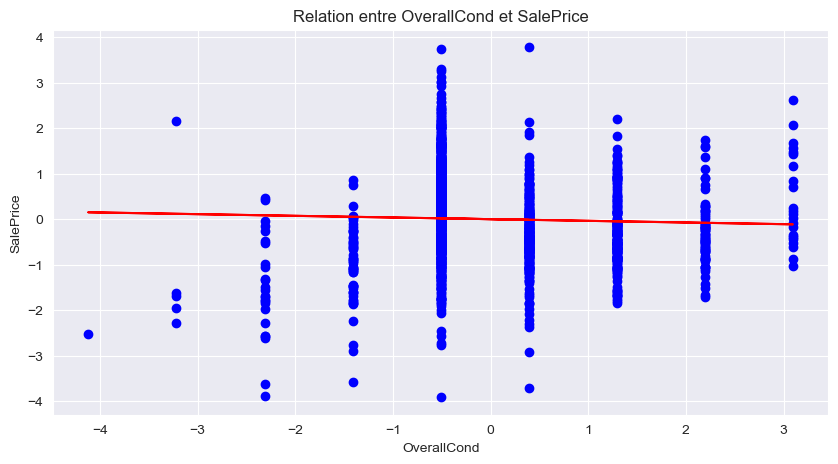

float64


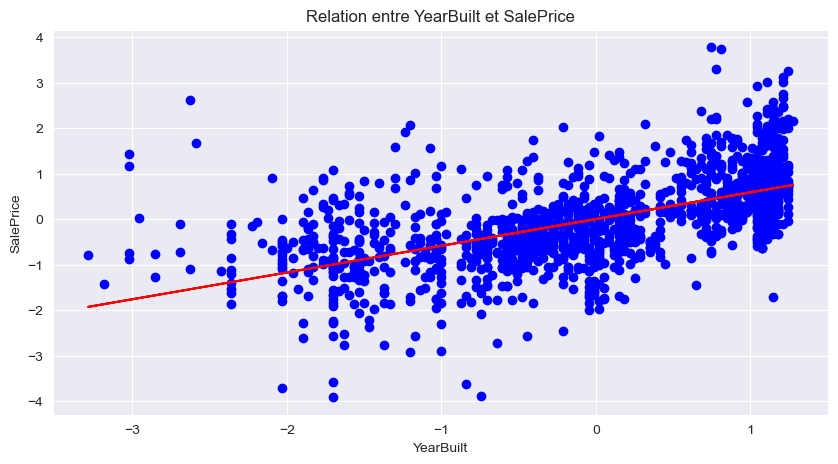

float64


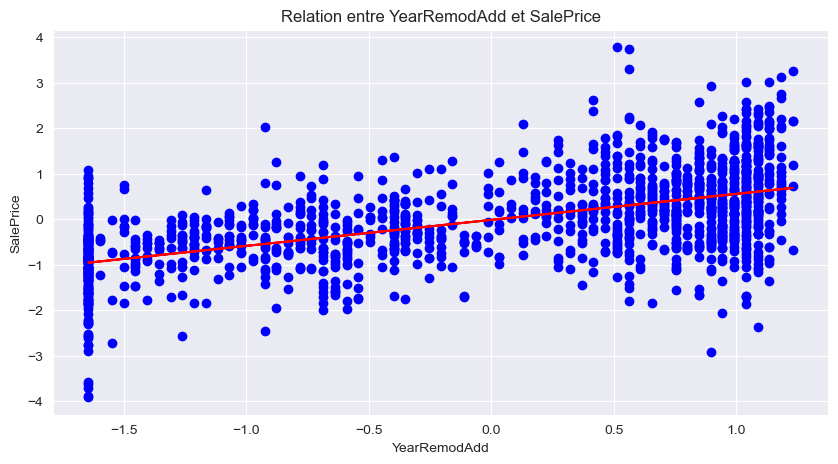

float64


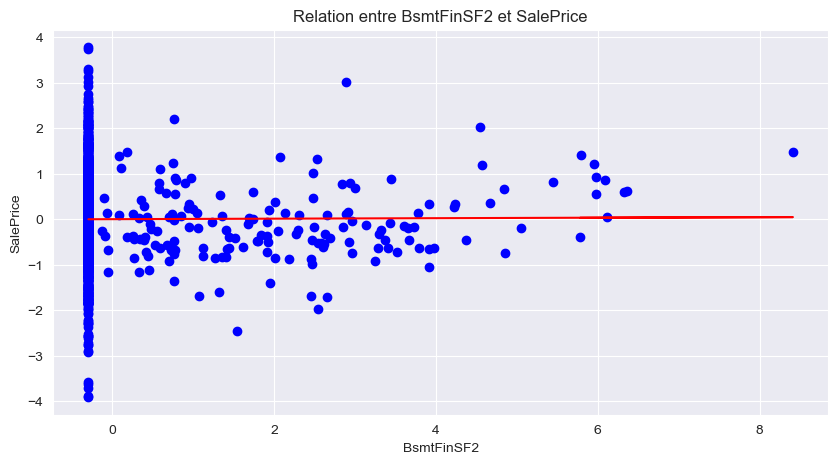

float64


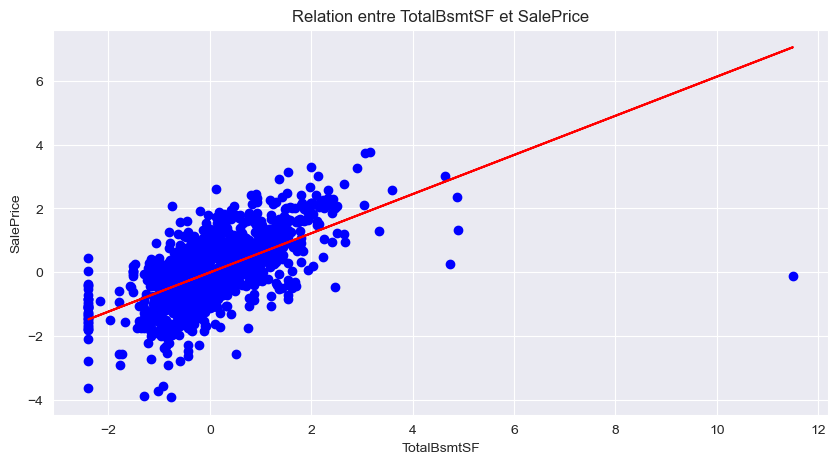

In [99]:
plot_line('LotArea')
plot_line('OverallCond')
plot_line('YearBuilt')
plot_line('YearRemodAdd')
plot_line('BsmtFinSF2')
plot_line('TotalBsmtSF')

## 3. Transformation des données (10 points)

### 3.1 Encodage des attributs de type `object`

Les attributs de type `object` étant catégoriques (voire partie 1), on peut effectuer un `one hot encoding` de ces attributs. `Pandas` permet d'effectuer cela avec la fonction `get_dummies()`. Cela nous permettra d'obtenir un dataset contenant uniquement des attributs de type `int` ou `float`.


#### 3.1.1 Question 8 (5 points)

**Encodez les attributs de type `object` avec un `one hot encoding`**

In [57]:
#TODO
#df.dtypes
df_categorical = df.select_dtypes(include=['object'])
df_encoded = pd.get_dummies(df_categorical)
df_encoded =  df_encoded.astype(int)
df_final = pd.concat([df.drop(columns=df_categorical.columns), df_encoded], axis=1)

# Afficher le nouveau DataFrame avec des attributs encodés


In [58]:
df_final

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,12.247694,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20,9600,8,1976,1976,0.0,1262.0,12.109011,0,0,...,0,0,0,1,0,0,0,0,0,0
2,60,11250,5,2001,2002,0.0,920.0,12.317167,0,0,...,0,0,0,0,0,0,0,1,0,0
3,70,9550,5,1915,1970,0.0,756.0,11.849398,0,0,...,0,0,0,0,0,0,0,0,1,0
4,60,14260,5,2000,2000,0.0,1145.0,12.429216,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
2915,160,1894,5,1970,1970,0.0,546.0,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
2916,20,20000,7,1960,1996,0.0,1224.0,NaN,0,0,...,0,0,0,0,0,0,0,1,0,0
2917,85,10441,5,1992,1992,0.0,912.0,NaN,0,0,...,0,1,0,0,0,0,0,0,0,0


### 3.2 Normalisation des données

Pour faciliter l'entraînement du modèle, on peut normaliser les données. `sklearn` permet d'effectuer cela avec les fonctions suivantes :

*   `c()` normalise les données en soustrayant la moyenne et en divisant par l'écart-type
*   `MinMaxScaler()` normalise les données en les ramenant entre 0 et 1.

Dans la suite de ce TP, nous utiliserons la fonction `StandardScaler()`.

In [59]:
# A utiliser dans la partie 6.2
mu_sale_price = df["SalePrice"].mean()
sigma_sale_price = df["SalePrice"].std()

In [60]:
df_final

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,12.247694,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20,9600,8,1976,1976,0.0,1262.0,12.109011,0,0,...,0,0,0,1,0,0,0,0,0,0
2,60,11250,5,2001,2002,0.0,920.0,12.317167,0,0,...,0,0,0,0,0,0,0,1,0,0
3,70,9550,5,1915,1970,0.0,756.0,11.849398,0,0,...,0,0,0,0,0,0,0,0,1,0
4,60,14260,5,2000,2000,0.0,1145.0,12.429216,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
2915,160,1894,5,1970,1970,0.0,546.0,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
2916,20,20000,7,1960,1996,0.0,1224.0,NaN,0,0,...,0,0,0,0,0,0,0,1,0,0
2917,85,10441,5,1992,1992,0.0,912.0,NaN,0,0,...,0,1,0,0,0,0,0,0,0,0


#### 3.2.1 Question 9 (5 points)

**Implémenter la fonction `normalize`. Elle doit réaliser la normalisation des données.**

In [61]:
def normalize(dataset):
    """
    Normalise les données du dataset.

    :param dataset: ensemble des données
    :return:
      dataset traitée
    """
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
    return df_scaled
    
    
normalize(df_final)

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.066066,-0.215504,-0.511162,1.044791,0.895701,-0.293353,-0.447678,0.560068,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
1,-0.874430,-0.068656,2.194499,0.152334,-0.398557,-0.293353,0.475862,0.212764,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,2.342595,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2,0.066066,0.142038,-0.511162,0.978683,0.847765,-0.293353,-0.302095,0.734046,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
3,0.301189,-0.075041,-0.511162,-1.863958,-0.686170,-0.293353,-0.675151,-0.437382,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,2.474318,-0.140004
4,0.066066,0.526395,-0.511162,0.945629,0.751894,-0.293353,0.209719,1.014651,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,2.417305,-1.047299,1.292612,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.09304,-0.223848,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2909,2.417305,-1.052662,-0.511162,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.09304,-0.223848,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2910,-0.874430,1.259356,1.292612,-0.376529,0.560152,-0.293353,0.389422,NaN,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
2911,0.653875,0.038734,-0.511162,0.681198,0.368411,-0.293353,-0.320293,NaN,-0.09304,-0.223848,...,-0.212626,2.364423,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004


In [62]:
df = normalize(df_final)
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.066066,-0.215504,-0.511162,1.044791,0.895701,-0.293353,-0.447678,0.560068,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
1,-0.874430,-0.068656,2.194499,0.152334,-0.398557,-0.293353,0.475862,0.212764,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,2.342595,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2,0.066066,0.142038,-0.511162,0.978683,0.847765,-0.293353,-0.302095,0.734046,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
3,0.301189,-0.075041,-0.511162,-1.863958,-0.686170,-0.293353,-0.675151,-0.437382,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,2.474318,-0.140004
4,0.066066,0.526395,-0.511162,0.945629,0.751894,-0.293353,0.209719,1.014651,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,2.417305,-1.047299,1.292612,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.09304,-0.223848,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2909,2.417305,-1.052662,-0.511162,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.09304,-0.223848,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2910,-0.874430,1.259356,1.292612,-0.376529,0.560152,-0.293353,0.389422,NaN,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
2911,0.653875,0.038734,-0.511162,0.681198,0.368411,-0.293353,-0.320293,NaN,-0.09304,-0.223848,...,-0.212626,2.364423,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004


In [101]:
df['MSZoning_RH'].max()

10.537478898601012

## 4. Sélection des attributs corrélées (15 points)

### 4.1 Suppression des attributs corrélées

Pour améliorer la qualité de la prédiction, nous devons prendre en compte la corrélation entre attributs. L'objectif est donc de supprimer les attributs les plus fortement corrélées entre eux.

Pour ce faire, vous disposez des fonctions suivantes

* `corr()` de `Pandas` qui calcule la matrice de corrélation
* `heatmap()` de `seaborn` qui permet de visualiser la matrice de corrélation


#### 4.1.1 Question 10 (10 points)

**Implémenter la fonction `display_corr_matrix`. Elle doit permettre d'afficher la matrice de corrélation entre les différents attributs de nos données après normalisation des données.**

In [63]:
def display_corr_matrix(dataset) : 
    """
    Créer et affiche la matrice de corrélation des attributs liés au dataset.

    :param dataset: ensemble des données
    """
    if 'SalePrice' in dataset.columns: 
        dataset = dataset.drop(labels = 'SalePrice' , axis = 1)
    corr_matrix = dataset.corr()
    
    
    # Création du heatmap
    plt.figure(figsize=(12, 12))  # Taille de la figure
    sns.heatmap(corr_matrix ,  cmap='coolwarm', cbar=True)
    plt.title("Matrice de Corrélation des Attributs Normalisés")
    plt.show()

    

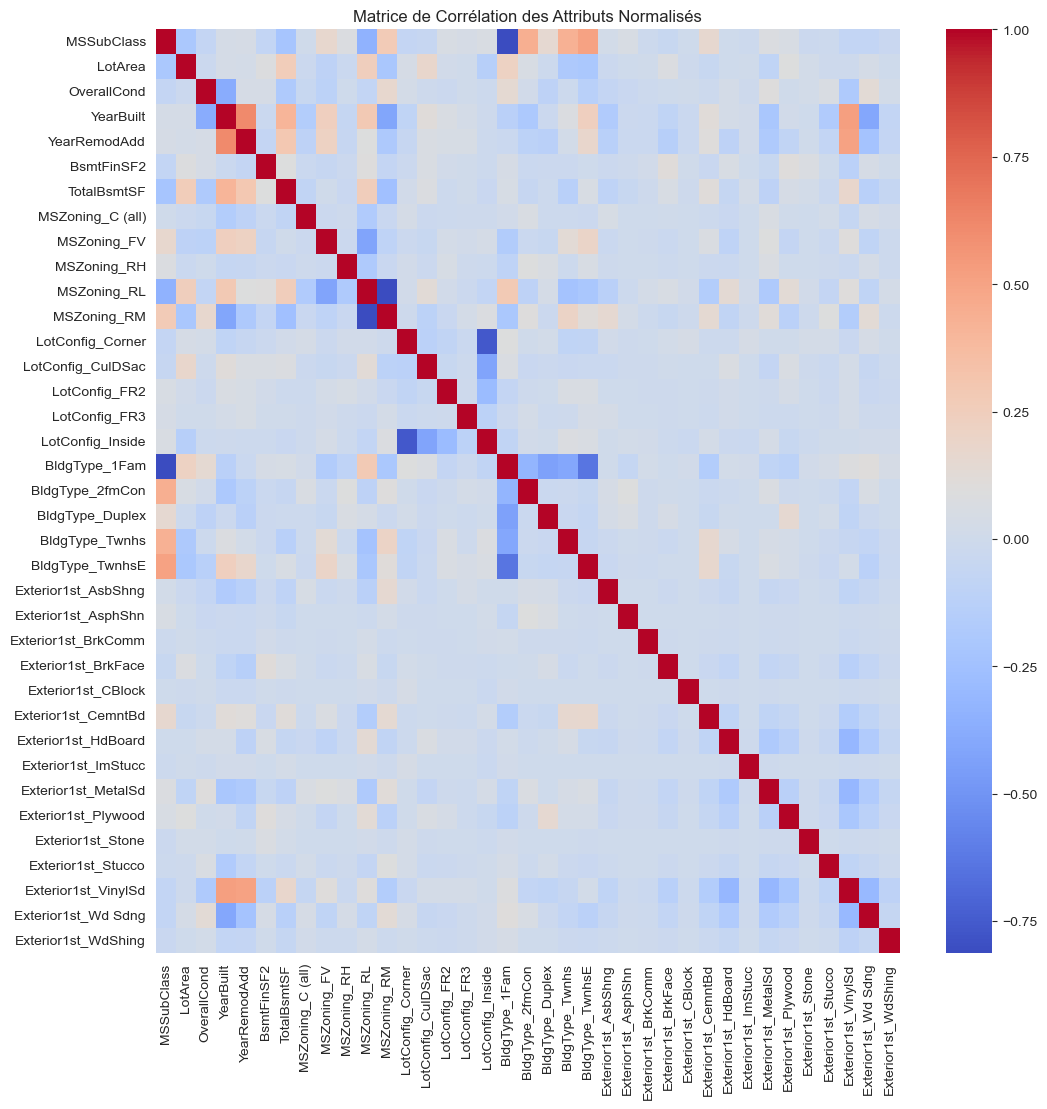

In [64]:
display_corr_matrix(df)

#### 4.1.2 Question 11 (5 points)

On peut alors choisir de supprimer les attributs qui sont fortement corrélées entre eux en définissant un seuil. Fixons ce seuil à 0.7.

**Quels sont les attributs fortement correlés selon le critère ci-dessus ? Supprimez ces attributs et affichez la nouvelle matrice de corrélation.**

In [65]:
#TODO

new_df = df.drop(labels = 'SalePrice' , axis = 1)
corr_matrix = new_df.corr()




In [66]:
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if np.abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i])
            col_name = corr_matrix.columns[i]
            to_drop.add(col_name)
            
new_df_reduced = new_df.drop(columns=to_drop)

#display_corr_matrix(new_df_reduced)


MSZoning_RM
LotConfig_Inside
BldgType_1Fam


In [67]:
df.drop(columns = to_drop , inplace=True)
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.066066,-0.215504,-0.511162,1.044791,0.895701,-0.293353,-0.447678,0.560068,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
1,-0.874430,-0.068656,2.194499,0.152334,-0.398557,-0.293353,0.475862,0.212764,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,2.342595,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2,0.066066,0.142038,-0.511162,0.978683,0.847765,-0.293353,-0.302095,0.734046,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
3,0.301189,-0.075041,-0.511162,-1.863958,-0.686170,-0.293353,-0.675151,-0.437382,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,2.474318,-0.140004
4,0.066066,0.526395,-0.511162,0.945629,0.751894,-0.293353,0.209719,1.014651,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,2.417305,-1.047299,1.292612,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.09304,-0.223848,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2909,2.417305,-1.052662,-0.511162,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.09304,-0.223848,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2910,-0.874430,1.259356,1.292612,-0.376529,0.560152,-0.293353,0.389422,NaN,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
2911,0.653875,0.038734,-0.511162,0.681198,0.368411,-0.293353,-0.320293,NaN,-0.09304,-0.223848,...,-0.212626,2.364423,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004


In [68]:
df.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing'],
      dtype='object')

## 5. Récapitulatif des prétraitements

<img src=" 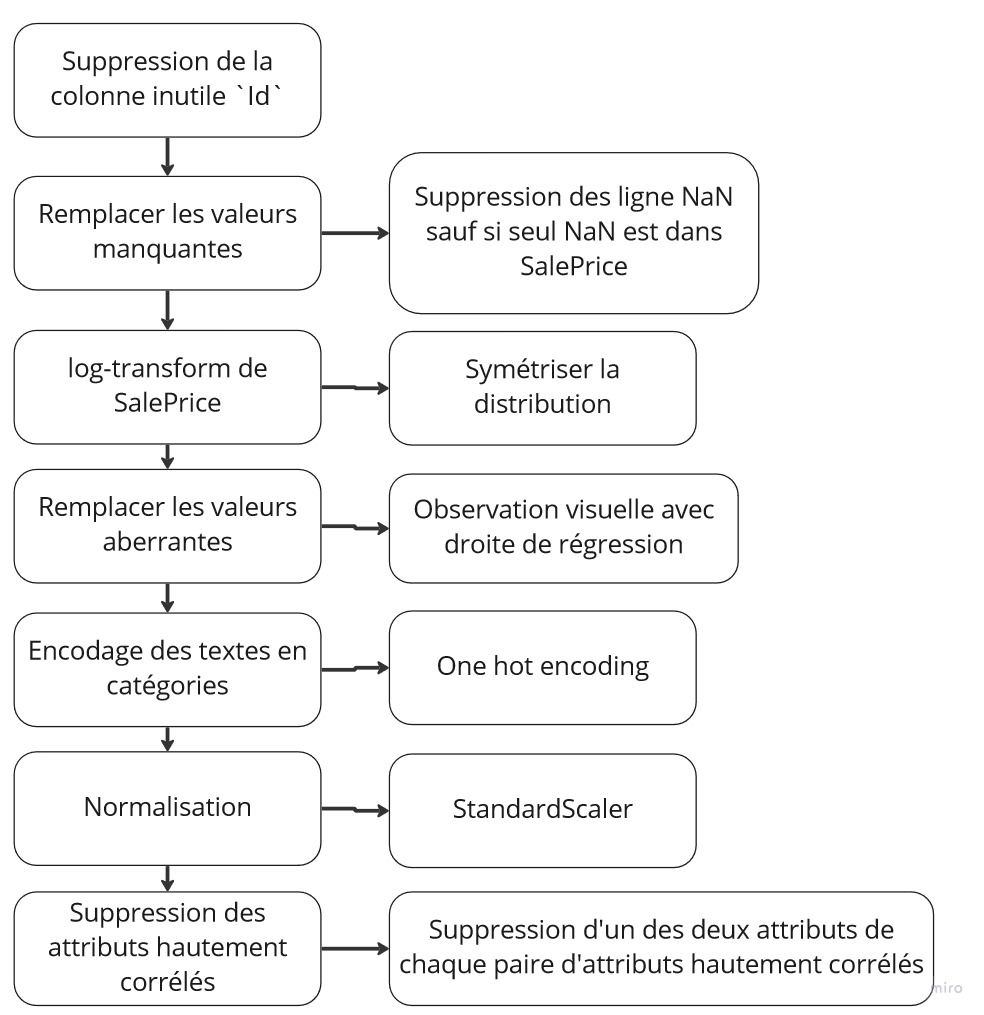" height="600px">

## 6. Entrainement d'un modèle de régression linéaire (30 points)

### 6.1 Rappel du concept

La régression linéaire consiste à trouver une fonction affine qui minimise la somme des carrés des erreurs. La fonction affine est définie par la formule suivante :
$$ f(x) = \beta_0 + \beta_1^T x $$
Nous tentons de trouver les paramètres $\beta_0$ et $\beta_1$ qui minimisent $\sum_{i=1}^n (f(x_i) - y_i)^2=||y-X\beta||^2$ où $X$ est la matrice des données fournies au modèle et $y$ le vecteur des `SalePrice`.

On veut trouver le minimum de cette fonction. On va utiliser `RidgeRegression` de `sklearn` pour trouver les paramètres $\beta_0$ et $\beta_1$. Ce module utilise la méthode des moindres carrés (`numpy.linalg.lstsq`) pour trouver les paramètres $\beta_0$ et $\beta_1$.

### 6.2 Application

#### 6.2.1 Question 12 (5 points)

Après avoir effectué le prétraitement, on peut commencer par séparer les données en un ensemble d'entraînement et un ensemble de test. Pour cela, les 1460 premières lignes contiennent les données d'entrainement. On peut ainsi séparer les données en deux ensembles.

**Compléter la structure suivante afin de diviser les données en deux sous-ensembles.**

In [69]:
data_train = {"x": df.loc[0:1459 , df.columns.drop('SalePrice')], "y": df.loc[0:1459 , 'SalePrice'], "df": df.loc[0:1459 , :]}
data_pred = {"x": df.loc[0:1459 , df.columns.drop('SalePrice')], "df": df.loc[1459:]}

#### 6.2.2 Question 13 (7.5 points)

Une fois cette scission faite, on peut utiliser `RidgeRegression` pour effectuer la régression linéaire avec pénalisation de la norme L2.

**Compléter la fonction `ridge_regression`. Elle doit implémenter l'ensemble de la régression.**

*Pour cette question, vous devez retourner les coefficients de la regression linéaire. De plus, cette fonction doit modifier le paramètre `data_pred` en y ajoutant les valeurs prédites. Il est aussi nécéssaire de prendre en compte certaines modifications effectuées lors de la transformation des données*

In [71]:
def ridge_regression(data_train, data_pred):
    """
    Réaliser la prédiction selon la régression de Rigde.

    :param data_train: données d'entrainement
    :param data_pred: données de prédiction
    :return:
      coefficients de la régression
      
    """

    rdg = Ridge(alpha=0.5)
    #X_train = np.array(data_train["x"])
    #Y_train = np.array(data_train['y'])
    
    rdg.fit(data_train['x'], data_train["y"])

    # Make predictions on the prediction data
    data_pred["y"] = rdg.predict(data_pred['x'])

    # Get the coefficients of the Ridge regression
    coefficients = rdg.coef_

    # Return the coefficients and the predicted values
    return coefficients, data_pred['y']
    
    
    

In [72]:
 coef , data_predicted = ridge_regression(data_train, data_pred)
 #print(data_predicted)
 #data_pred["y"]

#### 6.2.3 Question 14 (5 points)

**Comparer la distribution des données prédites avec celles d'entrainement.**

C:\Users\dalil\anaconda3\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dalil\anaconda3\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


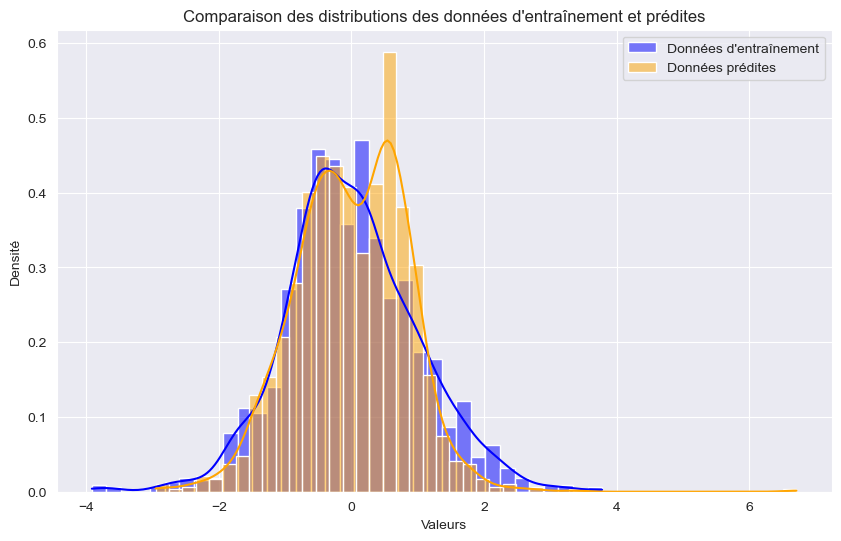

In [73]:
#TODO

plt.figure(figsize=(10, 6))
sns.histplot(data_train['y'], color="blue", label="Données d'entraînement", kde=True ,  stat="density")
sns.histplot(data_predicted, color="orange", label="Données prédites", kde=True, stat="density")
plt.title("Comparaison des distributions des données d'entraînement et prédites")
plt.xlabel("Valeurs")
plt.ylabel("Densité")
plt.legend()
plt.show()
    
 

### 6.3. Sélection des attributs importants
#### 6.3.1 Question 15 (5 points)

Une fois la prédiction obtenue, on peut maintenant mesurer l'importance de chaque attribut dans la prédicition en traçant les coefficients de la régression linéaire.

**Quels sont les dix attributs ayant le plus d'impact dans la prédiction ?**


In [74]:
best_attrs = np.argsort(np.abs(coef))[-10:]
print("Les dix attributs ayant le plus d'impact dans la prédiction : ")
for attr in best_attrs : 
    print(df.columns[attr])

Les dix attributs ayant le plus d'impact dans la prédiction : 
MSZoning_RH
OverallCond
BldgType_2fmCon
YearRemodAdd
LotConfig_FR3
BldgType_Duplex
YearBuilt
BldgType_Twnhs
TotalBsmtSF
MSSubClass


#### 6.3.2 Question 16 (7.5 points)

Cette dernière méthode n'est pas nécessairement une bonne mesure de l'importance d'un attribut. On peut utiliser la méthode SHAP (SHapley Additive exPlanations) pour effectuer la sélection des attributs.

**Les dix attributs ayant le plus d'impact dans la prédiction pour cette mesure sont-ils les mêmes que ceux de la question précédente ? Donnez une interprétation comparative de ces deux résultats**


In [75]:
#TODO
rdg = Ridge(alpha=0.5)
    
rdg.fit(data_train['x'], data_train["y"])
explainer = shap.Explainer(rdg, data_train['x'])

shap_values = explainer(data_train['x'])
shap_importance = np.abs(shap_values.values).mean(axis=0)


best_shap_attrs = np.argsort(shap_importance)[-10:]

print("Les dix attributs ayant le plus d'impact selon SHAP :")
for attr in best_shap_attrs:
    print(df.columns[attr])

Les dix attributs ayant le plus d'impact selon SHAP :
LotConfig_FR3
BldgType_2fmCon
MSZoning_RH
OverallCond
BldgType_Duplex
BldgType_Twnhs
YearRemodAdd
YearBuilt
TotalBsmtSF
MSSubClass


In [76]:
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.066066,-0.215504,-0.511162,1.044791,0.895701,-0.293353,-0.447678,0.560068,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
1,-0.874430,-0.068656,2.194499,0.152334,-0.398557,-0.293353,0.475862,0.212764,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,2.342595,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2,0.066066,0.142038,-0.511162,0.978683,0.847765,-0.293353,-0.302095,0.734046,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
3,0.301189,-0.075041,-0.511162,-1.863958,-0.686170,-0.293353,-0.675151,-0.437382,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,2.474318,-0.140004
4,0.066066,0.526395,-0.511162,0.945629,0.751894,-0.293353,0.209719,1.014651,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,2.417305,-1.047299,1.292612,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.09304,-0.223848,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2909,2.417305,-1.052662,-0.511162,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.09304,-0.223848,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2910,-0.874430,1.259356,1.292612,-0.376529,0.560152,-0.293353,0.389422,NaN,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
2911,0.653875,0.038734,-0.511162,0.681198,0.368411,-0.293353,-0.320293,NaN,-0.09304,-0.223848,...,-0.212626,2.364423,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004


## 7. Méthode des écarts interquartiles ou IRQ (10 points)

On peut également détecter les valeurs aberrantes en affichant un boxplot de chaque colonne. `Plotly` considère les valeurs aberrantes comme des outliers si elles sont situées en dehors de l'intervalle [Q1 - α * IQR, Q3 + α * IQR] où
* Q1 et Q3 sont les quantiles 25% et 75%,
* IQR l'intervalle interquartile (Q3 - Q1)
* α le facteur d'ajustement.

On exclut `SalePrice` car les seules valeurs manquantes de cet attribut sont celles du dataset de test.

### 7.1 Question 17 (5 points)

**A quelle valeur fixer le facteur d'ajustement α ? Combien y-a-t-il alors de données aberrantes pour chaque attribut ?**

In [121]:
# choix du facteur d'ajustement a ? Quelle valeur choisir ? 
df_analysis = df.drop(columns=['SalePrice'])
outliers = {}

def show_number_outliers(df , a=1.5) : 
    for i,column in enumerate(df.columns):
        if column != 'SalePrice' : 
            nb_outliers = 0 
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - a * IQR
            upper_bound = Q3 + a * IQR
            for value in df[column] : 
                if value<lower_bound or value>upper_bound: 
                    nb_outliers+=1
                    
            outliers[column]= nb_outliers
            '''
            fig = px.box(df_analysis, y=column, title=f'Boxplot de {column} avec Outliers marqués')
            fig.add_shape(type="line", 
                          x0=-0.5, x1=0.5, y0=lower_bound, y1=lower_bound, 
                          line=dict(color="blue", dash="dash"), 
                          xref='paper', yref='y')
            fig.add_shape(type="line", 
                          x0=-0.5, x1=0.5, y0=upper_bound, y1=upper_bound, 
                          line=dict(color="red", dash="dash"), 
                          xref='paper', yref='y')
            fig.show()
            '''
    print('number of outliers per attribute :')        
    print(outliers)
    
show_number_outliers(df)



number of outliers per attribute :
{'MSSubClass': 207, 'LotArea': 125, 'OverallCond': 250, 'YearBuilt': 9, 'YearRemodAdd': 0, 'BsmtFinSF2': 347, 'TotalBsmtSF': 119, 'MSZoning_C (all)': 25, 'MSZoning_FV': 139, 'MSZoning_RH': 26, 'MSZoning_RL': 649, 'LotConfig_Corner': 511, 'LotConfig_CulDSac': 176, 'LotConfig_FR2': 85, 'LotConfig_FR3': 13, 'BldgType_2fmCon': 62, 'BldgType_Duplex': 109, 'BldgType_Twnhs': 96, 'BldgType_TwnhsE': 227, 'Exterior1st_AsbShng': 43, 'Exterior1st_AsphShn': 2, 'Exterior1st_BrkComm': 6, 'Exterior1st_BrkFace': 87, 'Exterior1st_CBlock': 1, 'Exterior1st_CemntBd': 126, 'Exterior1st_HdBoard': 442, 'Exterior1st_ImStucc': 1, 'Exterior1st_MetalSd': 449, 'Exterior1st_Plywood': 221, 'Exterior1st_Stone': 2, 'Exterior1st_Stucco': 43, 'Exterior1st_VinylSd': 0, 'Exterior1st_Wd Sdng': 409, 'Exterior1st_WdShing': 56}


In [86]:
lower_bound['MSSubClass']

-2.637859470875725

In [112]:
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.066066,-0.215504,-0.511162,1.044791,0.895701,-0.293353,-0.447678,0.560068,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
1,-0.874430,-0.068656,2.194499,0.152334,-0.398557,-0.293353,0.475862,0.212764,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,2.342595,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2,0.066066,0.142038,-0.511162,0.978683,0.847765,-0.293353,-0.302095,0.734046,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
3,0.301189,-0.075041,-0.511162,-1.863958,-0.686170,-0.293353,-0.675151,-0.437382,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,2.474318,-0.140004
4,0.066066,0.526395,-0.511162,0.945629,0.751894,-0.293353,0.209719,1.014651,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,2.417305,-1.047299,1.292612,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.09304,-0.223848,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2909,2.417305,-1.052662,-0.511162,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.09304,-0.223848,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2910,-0.874430,1.259356,1.292612,-0.376529,0.560152,-0.293353,0.389422,NaN,-0.09304,-0.223848,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
2911,0.653875,0.038734,-0.511162,0.681198,0.368411,-0.293353,-0.320293,NaN,-0.09304,-0.223848,...,-0.212626,2.364423,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004


### 7.2 Question 18 (5 points)

**Traitez les données aberrantes identifiées à la question précédantes. Quel traitement appliquer ?**

**On peut remplacer les données aberrantes identifiées par la moyenne sur un attribut.
On peut aussi fixer une valeur de seuil égale au maximum de la valeur acceptable et la remplacer par celle-ci.

In [137]:
#TODO
new_df = df.copy() 
for i,column in enumerate(df.columns):
    if column != 'SalePrice' : 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        a = 1.5  
        lower_bound = Q1 - a * IQR
        upper_bound = Q3 + a * IQR
        for i,value in enumerate(df[column]) : 
            if value<lower_bound  : 
                new_df.loc[i,column] = lower_bound
                
            elif value>upper_bound: 
                new_df.loc[i,column] = upper_bound 


In [138]:
show_number_outliers(new_df)

number of outliers per attribute :
{'MSSubClass': 0, 'LotArea': 0, 'OverallCond': 0, 'YearBuilt': 0, 'YearRemodAdd': 0, 'BsmtFinSF2': 0, 'TotalBsmtSF': 0, 'MSZoning_C (all)': 0, 'MSZoning_FV': 0, 'MSZoning_RH': 0, 'MSZoning_RL': 0, 'LotConfig_Corner': 0, 'LotConfig_CulDSac': 0, 'LotConfig_FR2': 0, 'LotConfig_FR3': 0, 'BldgType_2fmCon': 0, 'BldgType_Duplex': 0, 'BldgType_Twnhs': 0, 'BldgType_TwnhsE': 0, 'Exterior1st_AsbShng': 0, 'Exterior1st_AsphShn': 0, 'Exterior1st_BrkComm': 0, 'Exterior1st_BrkFace': 0, 'Exterior1st_CBlock': 0, 'Exterior1st_CemntBd': 0, 'Exterior1st_HdBoard': 0, 'Exterior1st_ImStucc': 0, 'Exterior1st_MetalSd': 0, 'Exterior1st_Plywood': 0, 'Exterior1st_Stone': 0, 'Exterior1st_Stucco': 0, 'Exterior1st_VinylSd': 0, 'Exterior1st_Wd Sdng': 0, 'Exterior1st_WdShing': 0}


number of outliers per attribute :
{'MSSubClass': 207, 'LotArea': 125, 'OverallCond': 250, 'YearBuilt': 9, 'YearRemodAdd': 0, 'BsmtFinSF2': 347, 'TotalBsmtSF': 119, 'MSZoning_C (all)': 25, 'MSZoning_FV': 139, 'MSZoning_RH': 26, 'MSZoning_RL': 649, 'LotConfig_Corner': 511, 'LotConfig_CulDSac': 176, 'LotConfig_FR2': 85, 'LotConfig_FR3': 13, 'BldgType_2fmCon': 62, 'BldgType_Duplex': 109, 'BldgType_Twnhs': 96, 'BldgType_TwnhsE': 227, 'Exterior1st_AsbShng': 43, 'Exterior1st_AsphShn': 2, 'Exterior1st_BrkComm': 6, 'Exterior1st_BrkFace': 87, 'Exterior1st_CBlock': 1, 'Exterior1st_CemntBd': 126, 'Exterior1st_HdBoard': 442, 'Exterior1st_ImStucc': 1, 'Exterior1st_MetalSd': 449, 'Exterior1st_Plywood': 221, 'Exterior1st_Stone': 2, 'Exterior1st_Stucco': 43, 'Exterior1st_VinylSd': 0, 'Exterior1st_Wd Sdng': 409, 'Exterior1st_WdShing': 56}
